In [ ]:
import pandas as pd

In [ ]:
Bayesian2=pd.read_csv("/content/drive/MyDrive/Capsotn3/Capstone/Data/Bayesian2.csv")
Bayesian2 = Bayesian2.drop(columns=['Unnamed: 0'])
Bayesian2=Bayesian2.sort_values(by='val_Loss', ascending=False)
rows_to_drop = 1
Bayesian2 = Bayesian2.drop(Bayesian2.index[:rows_to_drop])

Random2=pd.read_csv("/content/drive/MyDrive/Capsotn3/Capstone/Data/Random2.csv")
Random2 = Random2.drop(columns=['Unnamed: 0'])
Random2=Random2.sort_values(by='val_Loss', ascending=False)
rows_to_drop = 10
Random2 = Random2.drop(Random2.index[:rows_to_drop])

greedy2=pd.read_csv("/content/drive/MyDrive/Capsotn3/Capstone/Data/greedy2.csv")
greedy2 = greedy2.drop(columns=['Unnamed: 0'])
greedy2=greedy2.sort_values(by='val_Loss', ascending=False)
rows_to_drop = 4
greedy2 = greedy2.drop(greedy2.index[:rows_to_drop])


hyperband2=pd.read_csv("/content/drive/MyDrive/Capsotn3/Capstone/Data/hyperband2.csv")
hyperband2 = hyperband2.drop(columns=['Unnamed: 0'])
hyperband2=hyperband2.sort_values(by='val_Loss', ascending=False)
rows_to_drop = 8
hyperband2 = hyperband2.drop(hyperband2.index[:rows_to_drop])

In [ ]:
df=hyperband2
df

,layer_block_1/Layer_1,layer_block_1/activation_1,layer_block_1/Layer_2,layer_block_1/activation_2,classification_head_1/spatial_reduction_1/reduction_type,classification_head_1/dropout,optimizer,learning_rate,tuner/epochs,tuner/initial_epoch,tuner/bracket,tuner/round,val_Loss
140,512,relu,192,sigmoid,global_max,0.50,sgd,0.00001,2,0,6,0,2.848860
126,352,relu,992,sigmoid,flatten,0.00,adam,0.00001,2,0,6,0,2.515966
89,192,sigmoid,480,softmax,flatten,0.00,adam,0.01000,2,0,6,0,2.506917
50,384,sigmoid,320,tanh,global_avg,0.25,adam,0.01000,2,0,6,0,2.495362
36,992,sigmoid,256,tanh,global_avg,0.00,adam,0.01000,2,0,6,0,2.478569
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,544,tanh,608,relu,flatten,0.50,adam,0.00001,2,0,6,0,1.940442
15,64,tanh,128,relu,flatten,0.00,adam_weight_decay,0.01000,2,0,6,0,1.905066
122,416,relu,128,tanh,flatten,0.25,adam_weight_decay,0.01000,2,0,6,0,1.886702
48,192,relu,288,tanh,flatten,0.50,sgd,0.01000,2,0,6,0,1.884809


In [ ]:


df=df.sort_index()

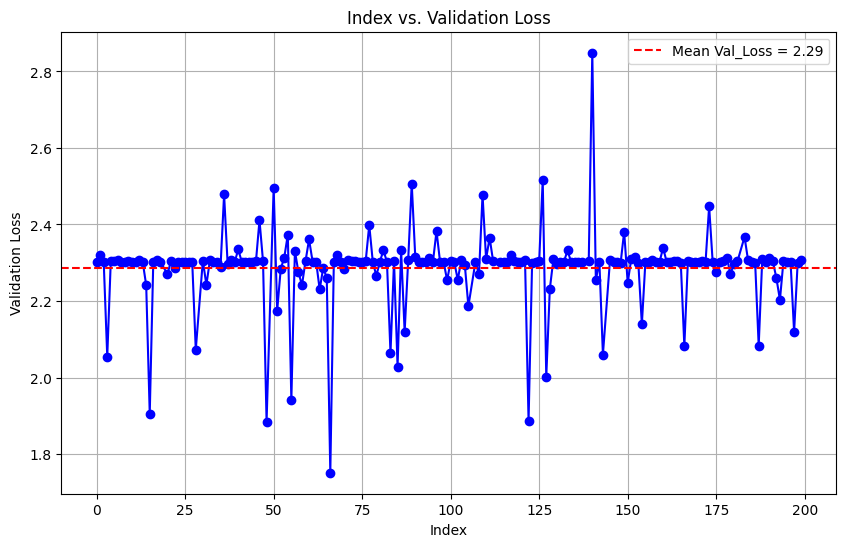

In [ ]:
mean_val_loss = df['val_Loss'].mean()

# Create a bar plot of val_Loss
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val_Loss'], marker='o', linestyle='-', color='b')
plt.title('Index vs. Validation Loss')
plt.xlabel('Index')
plt.ylabel('Validation Loss')

# Mark the mean value on the plot
plt.axhline(y=mean_val_loss, color='r', linestyle='--', label=f'Mean Val_Loss = {mean_val_loss:.2f}')
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
df

,layer_block_1/Layer_1,layer_block_1/activation_1,layer_block_1/Layer_2,layer_block_1/activation_2,classification_head_1/spatial_reduction_1/reduction_type,classification_head_1/dropout,optimizer,learning_rate,val_Loss
0,32,relu,32,tanh,flatten,0.00,adam,0.0010,1.831001
2,32,relu,32,tanh,flatten,0.25,adam,0.0010,1.864321
3,32,relu,32,tanh,global_avg,0.00,adam,0.0010,2.247642
4,32,softmax,32,tanh,flatten,0.00,adam,0.0010,2.083750
5,32,tanh,32,tanh,flatten,0.00,adam,0.0010,1.900803
...,...,...,...,...,...,...,...,...,...
167,96,relu,736,relu,flatten,0.25,adam_weight_decay,0.0010,1.716175
168,96,relu,384,relu,flatten,0.25,adam_weight_decay,0.0010,1.717935
169,96,relu,160,relu,flatten,0.25,adam_weight_decay,0.0010,1.724907
170,768,sigmoid,320,softmax,flatten,0.00,adam_weight_decay,0.0001,2.304678
